Импорт необходимых библиотек



In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

Запись в массив исходных данных, полученных из публичного датасета

In [ ]:
train, _ = tfds.load("cats_vs_dogs", split=['train[:100%]'], with_info=True, as_supervised=True)

Проверка вывода изображения и его метаинформации



tf.Tensor(1, shape=(), dtype=int64)


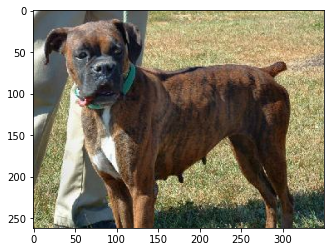

In [ ]:
for img, metavalue in train[0].take(1):
  plt.figure()
  plt.imshow(img)
  print(metavalue)

Необходимо изменить разрешение картинки, для введения разрешения как константы для нейросети, что исключит возможные ошибки при обучении. Также размер 256х256 является чем-то средним между распознаваемой картинкой и совсем нераспознаваемой, что позволит получить от нейросети определенный результат и при этом сократить время обучения и обработки изображений

In [51]:
size = 256 #нейросеть работает именно с разрешением 224х224
def image_resizing(img, metavalue):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (size, size))
  img = img / 255.0 #для введения изображения в пикселях в диапазон от 0 до 1
  return img, metavalue

Применение функции изменения размера к учебному массиву и разбиение тренировочного массива на части, поскольку возможность обработки всего массива с графическими файлами напрямую зависит от системы пользователя  

In [ ]:
train_resized = train[0].map(image_resizing)
train_slices = train_resized.shuffle(1000).batch(16)

Импортирование слоевой структуры сверточной  нейросети и отказываемся от ее тренировки, поскольку алгоритм работы ей уже усвоен.

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(size, size, 3), include_top = False)
base_layers.trainable = False

Создание модели

In [ ]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer="adam", loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics =['accuracy'])

Обучение нейронной сети

In [ ]:
model.fit(train_slices, epochs=1)

1454/1454 [==============================] - 855s 588ms/step - loss: 0.0687 - accuracy: 0.9736


Загрузка пользовательской картинки, данный блок может отличаться в зависимости от среды, которую используете

In [48]:
files.upload()

Saving 3.jpg to 3.jpg


{'3.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00;\x00\x00\xff\xe1\x03\x1dhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c142 79.160924, 2017/07/13-01:06:39        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:DocumentID="xmp.did:82DE90DBFB3211E7B8BC8654371CEBE9" xmpMM:InstanceID="xmp.iid:82DE90DAFB3211E7B8BC8654371CEBE9" xmp:CreatorTool="Adobe Photoshop CC 2018 Windows"> <xmpMM:DerivedFrom stRef:instanceID="33DC3A067D46CB6D13D57AE0AF14F013" stRef:documentID="33DC3A067D46CB6D13D57AE0AF14F013"/> </rdf:Description> </rdf:RDF> </x:xmpmeta> <?xpacket end="r"?>\xff\xee\x00\x0e

Блок обработки пользовательского изображения и его вывод 

Text(0.5, 1.0, 'DOG [[4.168595]]')

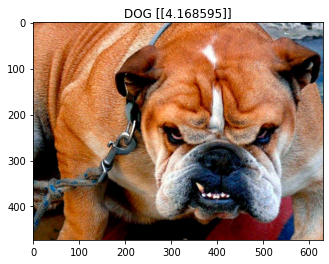

In [50]:
new_image = load_img('3.jpg')
img_array = img_to_array(new_image)
img_resized, _ = image_resizing(img_array, _)
img_expended = np.expand_dims(img_resized, axis = 0)
prediction = model.predict(img_expended)
pred_label = "CAT" if prediction < 0.5 else "DOG"
plt.figure()
plt.imshow(new_image)
plt.title(f'{pred_label} {prediction}')

